In [38]:
#This program one part of the Final project Ecommerce sales analysis for q website (WISH)
# Data has taken from Kaggle
#URL : Kaggle  Data World
#Goal : To identify the performance of sales and predict future trends
#IF time permits and possible would like to explore the aspect of the feature engneering 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from joypy import joyplot

In [39]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [40]:
#Reading the summer products csv file 
#this file is available in Kaggle and data world
datapath = 'summer-products-with-rating-and-performance_2020-08.csv'

In [41]:
#Identifying the number of columns and rows
productsdf=pd.read_csv(datapath, sep=',')
productsdf.shape

(1573, 43)

In [42]:
#Examine and clean data
productsdf.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [43]:
productsdf.columns.values.tolist()

['title',
 'title_orig',
 'price',
 'retail_price',
 'currency_buyer',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'tags',
 'product_color',
 'product_variation_size_id',
 'product_variation_inventory',
 'shipping_option_name',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'urgency_text',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_id',
 'merchant_has_profile_picture',
 'merchant_profile_picture',
 'product_url',
 'product_picture',
 'product_id',
 'theme',
 'crawl_month']

In [44]:
productsdf.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


In [45]:
productsdf.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [46]:
# data preprocessing 
#Identifying the duplicates and trying to remove them
productsdf.duplicated().any()

True

In [47]:
#there is duplicate input so we will drop it though

#productsdf = productsdf.drop_duplicates()

#https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
#https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
#df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)
#df = df.drop(columns=['column_nameA', 'column_nameB'])
duplicateColumns = productsdf[productsdf.duplicated()]

In [48]:
## dropping ALL duplicte values 
#data.drop_duplicates(subset ="First Name",keep = False, inplace = True) 

productsdf.drop_duplicates(['title', 'currency_buyer', 'urgency_text','merchant_info_subtitle', 'merchant_profile_picture', 'product_url', 
'product_picture', 'product_id', 'theme', 'inventory_total', 'crawl_month'],keep= False, inplace= True)

In [49]:
productsdf.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


In [50]:
#Number of columns and rows after removing the duplicates
productsdf.shape

(1505, 43)

In [51]:
# Before removing duplicates it was (1573, 43) and after removing duplicates the data shows as (1539, 43) whichc means we
#have removed 34 duplicate rows information
#Now we have to identify if there are any null values
null_val = pd.DataFrame(productsdf.isnull().sum())
null_val.columns = ['null_val']

In [52]:
null_val['percent_'] = round(null_val['null_val'] / len(productsdf.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:10]

,null_val,percent_
merchant_profile_picture,1281,85.0
has_urgency_banner,1042,69.0
urgency_text,1042,69.0
rating_two_count,41,3.0
product_color,41,3.0
rating_five_count,41,3.0
rating_four_count,41,3.0
rating_three_count,41,3.0
rating_one_count,41,3.0
origin_country,15,1.0


In [53]:
productsdf.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


In [54]:
len(productsdf.index)

1505

In [55]:
pd.DataFrame(productsdf['product_variation_size_id'].value_counts())

,product_variation_size_id
S,619
XS,332
M,196
XXS,88
L,49
...,...
S Diameter 30cm,1
6XL,1
AU plug Low quality,1
5PAIRS,1


In [56]:
size_list = list(productsdf['product_variation_size_id'])
size_list

['M',
 'XS',
 'XS',
 'M',
 'S',
 'Size-XS',
 'XS',
 'M.',
 'M',
 'S',
 'XXS',
 'XS',
 'XS',
 'S',
 'S',
 'S',
 'L',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'M',
 'XXS',
 'M',
 'M',
 'S',
 'XS',
 'XXL',
 'S',
 'XXS',
 'S',
 'M',
 'S',
 'S',
 'S',
 'XS',
 'S',
 'L',
 'S',
 'S',
 'XS',
 nan,
 'S',
 'S',
 'S',
 'S',
 'S',
 'XXS',
 'XXS',
 's',
 'L',
 'choose a size',
 'XXS',
 'S',
 'XS',
 'M',
 'XS',
 'XS',
 'S',
 'S',
 'M',
 'XS',
 'M',
 'M',
 'XS',
 'S',
 'M',
 'M',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'XS.',
 'S',
 'M',
 'M',
 'S',
 'XS',
 'S',
 'L',
 'S',
 'XS',
 'M',
 'XS',
 'XS',
 'XS',
 'S',
 '32/L',
 'L',
 'Suit-S',
 'S',
 'S',
 'XXS',
 'S',
 'S',
 'XS',
 'XS',
 'XS',
 'XXXXXL',
 'XXS',
 'S',
 'XS',
 nan,
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'M',
 'M',
 'S',
 'XS',
 'L',
 'XXS',
 'XS',
 'XS',
 'S',
 'XS',
 'S',
 'XS',
 'L',
 'EU 35',
 'S',
 'S',
 '4',
 'M',
 'S',
 'M',
 'L',
 'S',
 'S',
 'S',
 'S',
 'S',
 'XS',
 'XS',
 'S',
 'Size S.',
 'S',
 'S',
 'S',
 'S',
 'M',
 

In [57]:
# The above result shows as descrepancy in defining the size as S and SIZE S so this needs to be corrected and get the most useful
#way to understand by the computer

size_list = list(productsdf['product_variation_size_id'])

xxs_err = []
xs_err = []
s_err = []
m_err = []
l_err = []
xl_err = []
xxl_err = []

for i in size_list:
    if (i == 'XXS') or (i == 'XXXS') or (i == 'SIZE XXS') or (i == 'SIZE-XXS') or (i == 'SIZE -XXS'):
        xxs_err.append(i)
    elif (i == 'XS') or (i == 'XS.') or (i == 'SIZE XS') or (i == 'SIZE-XS'):
        xs_err.append(i)
    elif (i == 'S') or (i == 'S.') or (i == 'SUIT-S') or (i == 'SIZE S.') or (i == 'SIZE S') or (i == 'S..') \
    or (i == 'S(BUST 88CM)') or (i == 'S (WAIST58-62CM)') or (i == 'SIZE-S') or (i == 'S DIAMETER 30CM') or (i == '25-S') \
    or (i == 'SIZE/S') or (i == 'PANTS-S') or (i == 'SIZE--S'):
        s_err.append(i)
    elif (i == 'M') or (i == 'M.') or (i == 'SIZE M'):
        m_err.append(i)
    elif (i == 'L') or (i == '32/L') or (i == 'L.') or (i == 'SIZEL'):
        l_err.append(i)
    elif (i == 'XL') or (i == 'X   L'):
        xl_err.append(i)
    elif (i == 'XXL') or (i == 'XXXXXL') or (i == '3XL') or (i == 'SIZE-4XL') or (i == 'XXXL') or (i == '5XL') \
    or (i == '2XL') or (i == '4XL') or (i == 'XXXXL') or (i == '6XL') or (i == 'SIZE-5XL') or (i == 'SIZE4XL') \
     or (i == '04-3XL') or (i == '1 PC - XL'):
        xxl_err.append(i)       

In [58]:
def size(tipe):
    if tipe in xxs_err:
        return 'XXS'
    elif tipe in xs_err:
        return 'XS'
    elif tipe in s_err:
        return 'S'
    elif tipe in m_err:
        return 'M'
    elif tipe in l_err:
        return 'L'
    elif tipe in xl_err:
        return 'XL'
    elif tipe in xxl_err:
        return 'XXL'
    else:
        return 'OTHER'
    
productsdf['product_variation_size_id'] = productsdf['product_variation_size_id'].apply(size)

In [59]:
pd.DataFrame(productsdf['product_variation_size_id'].value_counts())

,product_variation_size_id
S,636
XS,341
M,200
OTHER,125
XXS,97
L,51
XXL,37
XL,18


<AxesSubplot:xlabel='product_variation_size_id', ylabel='units_sold'>

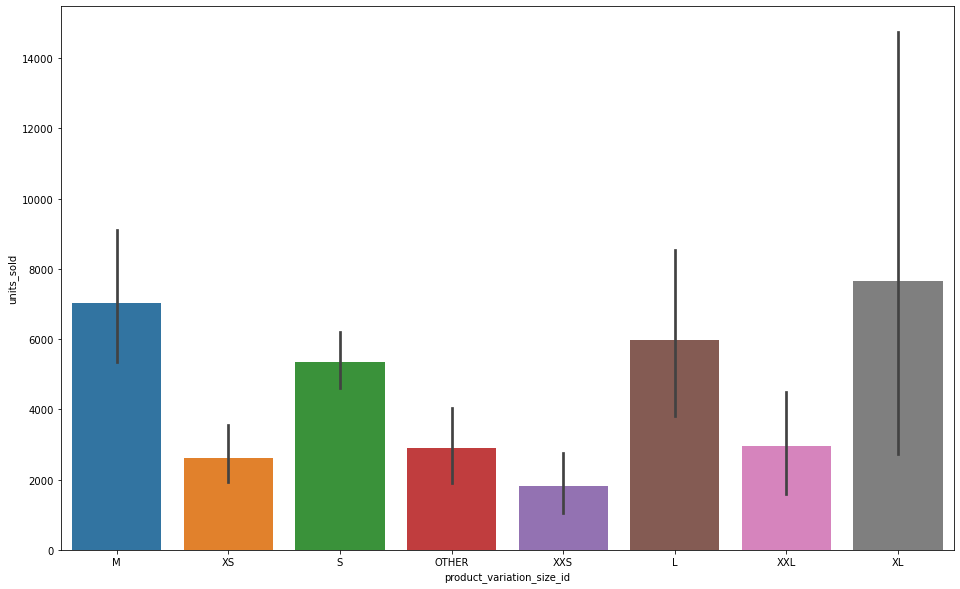

In [60]:
#Below plot shows how many sizes are sold out based on size
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.barplot(x="product_variation_size_id", y="units_sold", data=productsdf)

C:\Users\praso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



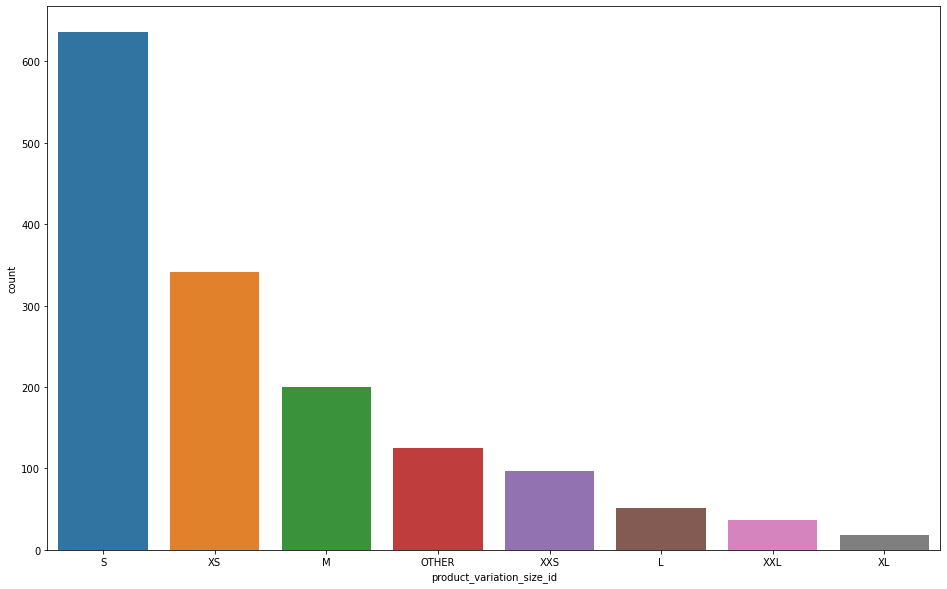

In [61]:
#Total available count of sizes in the inventory
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.countplot('product_variation_size_id',
              order = productsdf['product_variation_size_id'].value_counts().index,
              data = productsdf)
plt.show()

In [62]:
productsdf.groupby('shipping_option_name').agg(['count', 'sum'])['units_sold']

,count,sum
shipping_option_name,,
Ekspresowa wysyłka,1,10000
Envio Padrão,9,22400
Envío normal,5,16100
Expediere Standard,6,2400
Livraison Express,3,1200
Livraison standard,1440,6572589
Spedizione standard,2,1100
Standard Shipping,21,88550
Standardowa wysyłka,3,30100


C:\Users\praso\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 3585 missing from current font.

C:\Users\praso\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 3634 missing from current font.

C:\Users\praso\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 3619 missing from current font.

C:\Users\praso\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 3626 missing from current font.

C:\Users\praso\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 3656 missing from current font.

C:\Users\praso\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 3591 missing from current font.

C:\Users\praso\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 3636 missing from current font.

C:\Users\praso\anaconda3\li

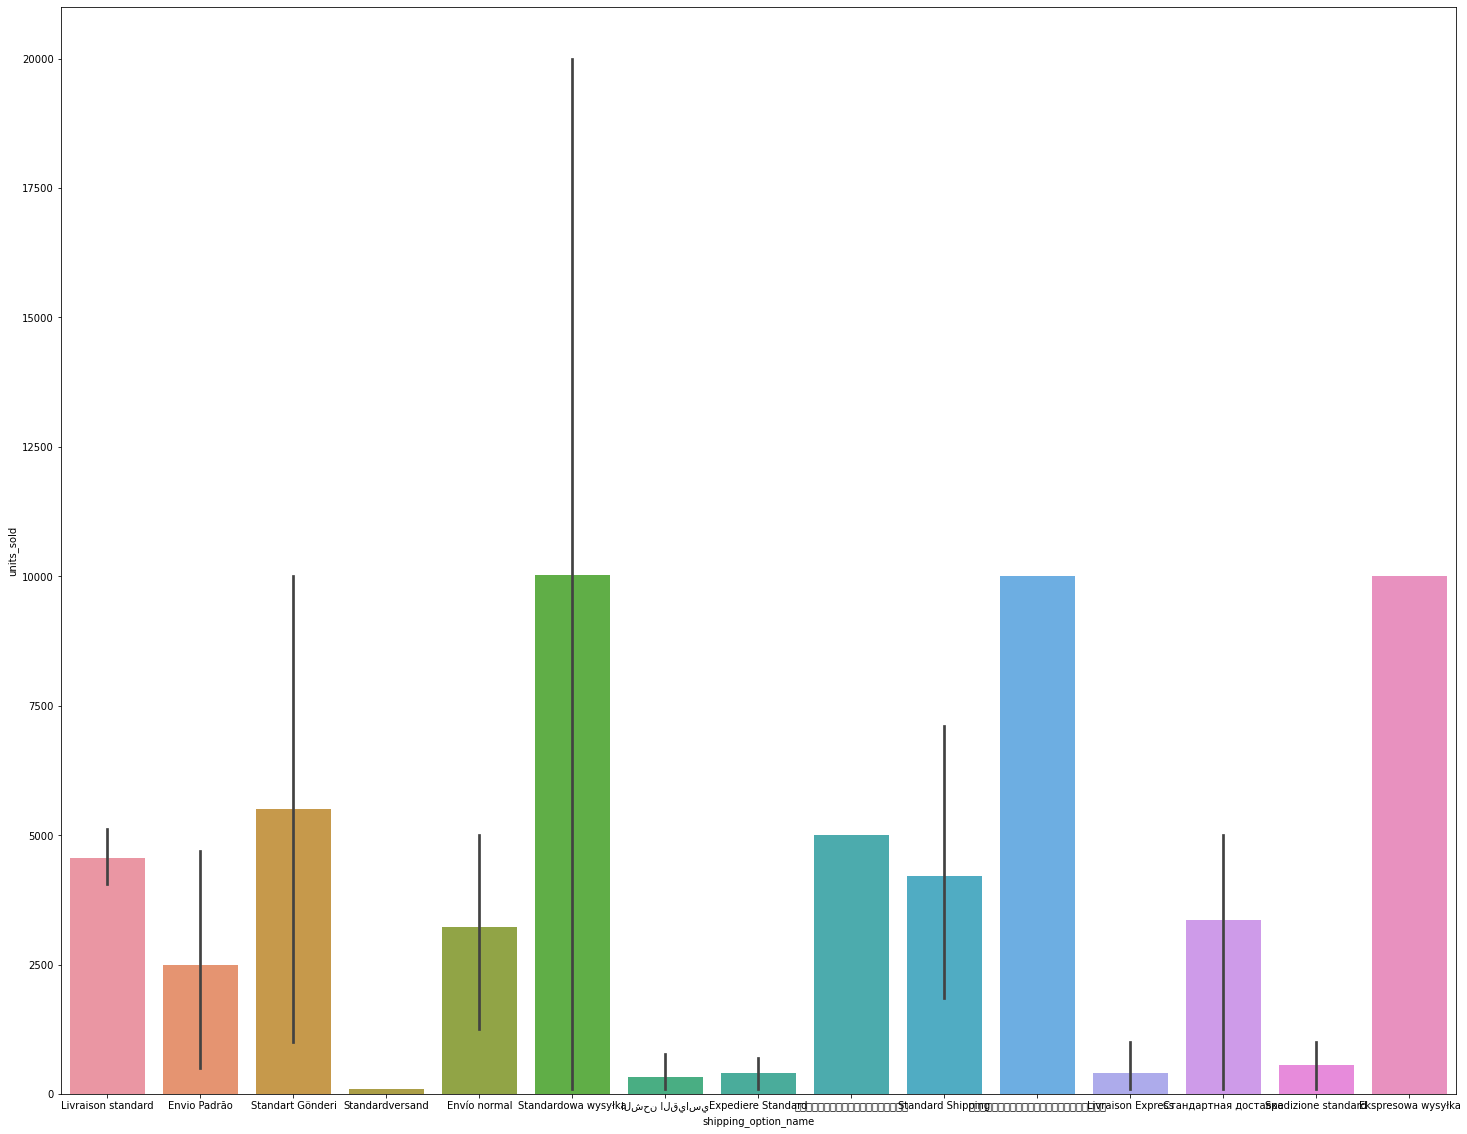

In [71]:
fig = plt.gcf()
fig.set_size_inches( 25, 20)
sns.barplot(x="shipping_option_name", y="units_sold", data=productsdf)
plt.show()

C:\Users\praso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='retail_price', ylabel='Density'>

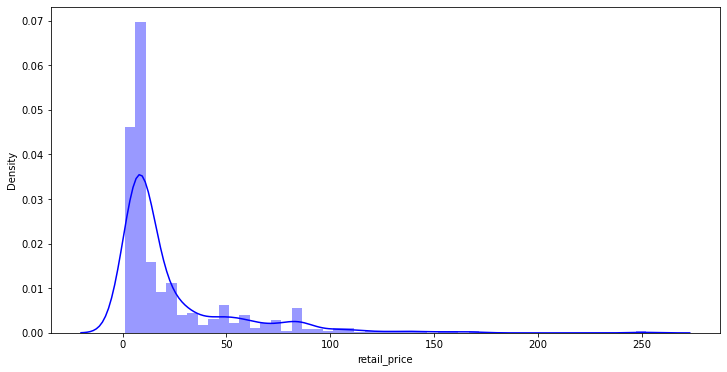

In [64]:
#this is about the relation between the higher price products and the items that were kind of sold
#Result shows that the histogram is left skewed which means that , the lesser the price items are more sold than that of higher price items
plt.figure(figsize=(12,6))
sns.distplot(productsdf['retail_price'], color='blue', label='Retail price')

In [65]:
country_price=productsdf[['units_sold','origin_country']]
country_mean_price=country_price.groupby('origin_country')['units_sold'].mean().reset_index()
country_mean_price.rename(columns={'units_sold': 'units_sold_mean'},inplace=True)
to_codes={'CN':'CHN',
         'GB':'GBR',
         'SG':'SGP',
         'US':'USA',
         'VE':'VEN'}
country_mean_price['code']=country_mean_price['origin_country'].map(to_codes)
country_mean_price

,origin_country,units_sold_mean,code
0,AT,100.000000,NaN
1,CN,4554.703168,CHN
2,GB,1000.000000,GBR
3,SG,10050.000000,SGP
4,US,1405.161290,USA
5,VE,83.333333,VEN


In [66]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [67]:
country_sales_map=px.choropleth(country_mean_price,
                       color='units_sold_mean',
                       locations='code',
                       hover_name='code',
                       color_continuous_scale=px.colors.sequential.Plasma,
                       title='Sales verses origin country')
country_sales_map.show()

In [68]:
rating_cols=['rating_count','rating_five_count','rating_four_count',
             'rating_three_count','rating_two_count','rating_one_count']
ratings_data=productsdf[rating_cols+['uses_ad_boosts']]

ratings_data.groupby('uses_ad_boosts').describe()

rating_count                                               \
                      count         mean          std  min    25%    50%   
uses_ad_boosts                                                             
0                     844.0  1019.214455  2174.566458  0.0  30.75  238.5   
1                     661.0   806.718608  1798.042102  0.0  25.00  127.0   

                               rating_five_count              ...  \
                  75%      max             count        mean  ...   
uses_ad_boosts                                                ...   
0               914.0  20744.0             822.0  505.343066  ...   
1               827.0  17980.0             642.0  400.995327  ...   

               rating_two_count         rating_one_count              \
                            75%     max            count        mean   
uses_ad_boosts                                                         
0                          72.0  2003.0            822.0  108.739659   
1                          60.0  1410.0            642.0   87.669782   

                                                           
                       std  min  25%   50%    75%     max  
uses_ad_boosts                                             
0               235.916768  0.0  4.0  26.5  112.0  2789.0  
1               191.869756  0.0  4.0  17.0   85.0  1846.0  

[2 rows x 48 columns]

In [69]:
fig = go.Figure()
for col in rating_cols:
    fig.add_trace(go.Box(x=ratings_data['uses_ad_boosts'],
                         y=ratings_data[col],
                         name=col,
                         boxmean=True,
                         boxpoints=False))
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(boxmode='group',
                  title='Relations between ad boosts and rating',
                  xaxis = dict(
                  tickvals = [0,1],
                  ticktext = ['Without ad boosts','With ad boosts']))
fig.show()

<Figure size 7200x3240 with 0 Axes>

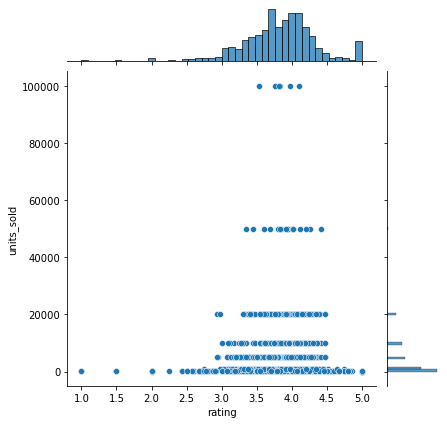

In [33]:
cmp_table=productsdf[['units_sold','rating','rating_count']]
plt.figure(figsize=(100,45))
sns.jointplot(data=cmp_table,
             x='rating',
             y='units_sold')
plt.show()

In [34]:
line=go.Scatter3d(x=cmp_table['rating'],
                  y=cmp_table['rating_count'],
                  z=cmp_table['units_sold'])
fig=go.Figure(line)
fig.update_layout(title='Impact of rating and rating count to sales',
                  height = 1000,
                  width = 1000,
                  scene = dict(
                  xaxis_title='rating',
                  yaxis_title='rating_count',
                  zaxis_title='units_sold'))
fig.show()

In [94]:
#how merchants are going to be benefited 
merchant_sales=productsdf[['merchant_title','merchant_rating_count',
                         'merchant_rating','merchant_has_profile_picture','units_sold']]

In [95]:
merchant_sales['merchant_rating'].max()

5.0

In [96]:
merchant_sales['merchant_rating'].min()

2.333333333333333

In [97]:
bins1 = [2.3, 3.5, 4.0, 4.5, 4.9, 5.0, np.inf]
cats1 = pd.cut(merchant_sales['merchant_rating'],bins1)
merchant_sales['merchant_raing_cats']=cats1

C:\Users\praso\AppData\Local\Temp/ipykernel_2808/796799860.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
bins2 = [0, 250000, 900000, np.inf]
cats2 = pd.cut(merchant_sales['merchant_rating_count'],bins2)
merchant_sales['raing_count_cats']=cats2

C:\Users\praso\AppData\Local\Temp/ipykernel_2808/176747559.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



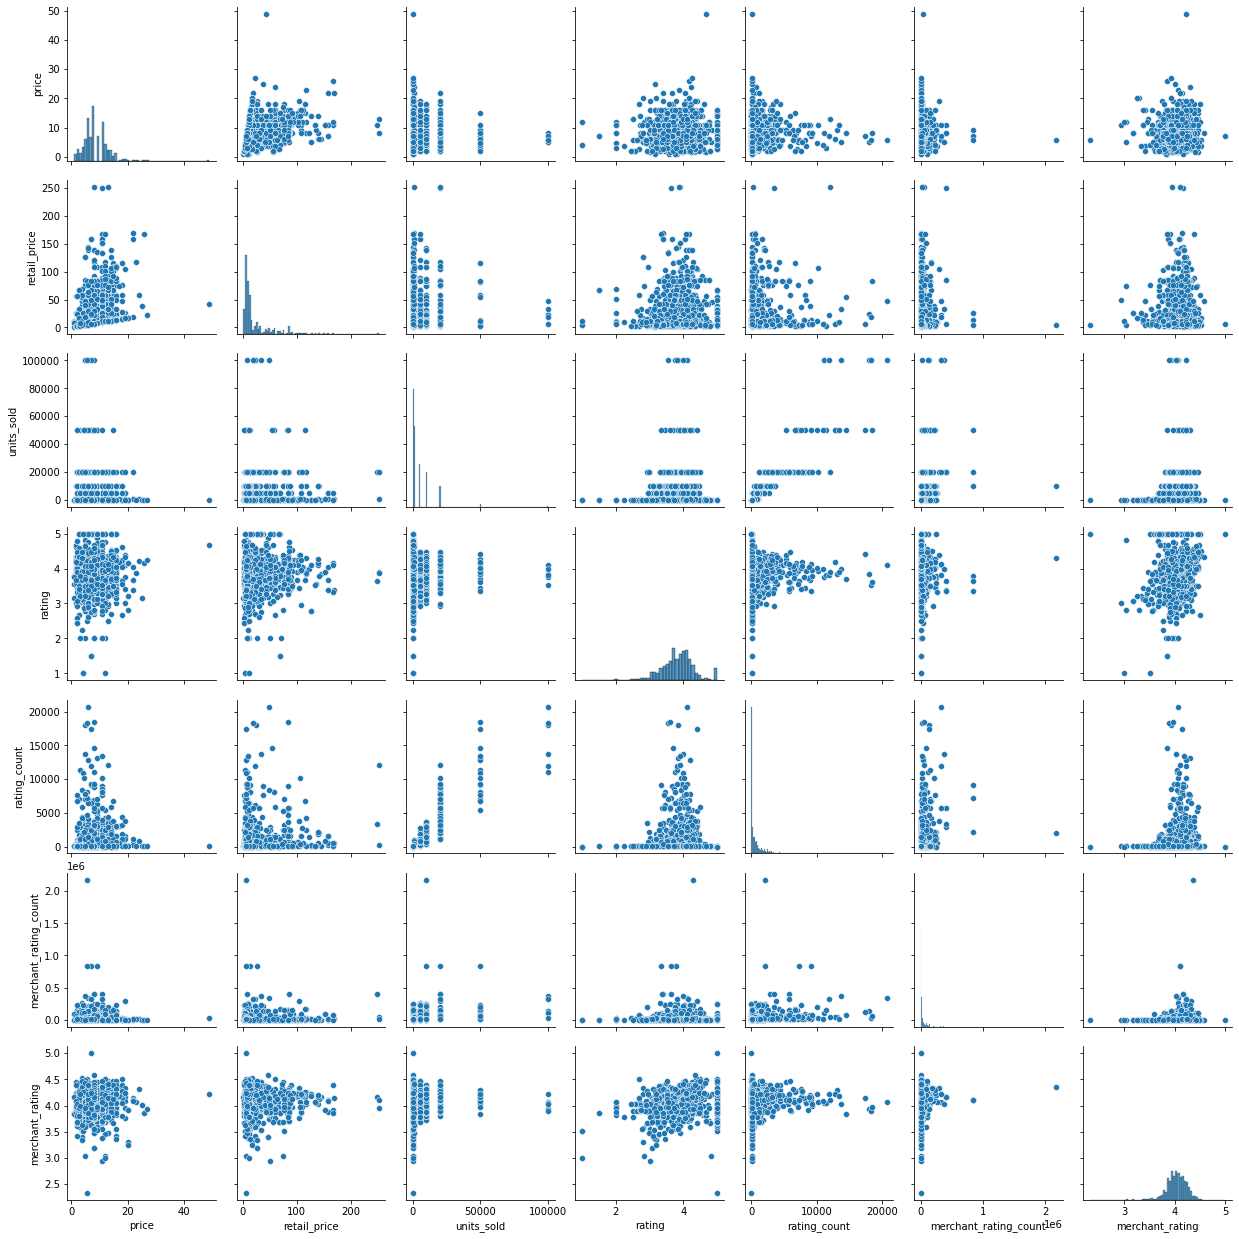

In [99]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(productsdf[['price', 'retail_price', 'units_sold', 'rating','rating_count', 
                 'merchant_rating_count', 'merchant_rating']]);

In [100]:
data = productsdf[['price', 'retail_price', 'units_sold', 'rating','rating_count', 
                 'merchant_rating_count', 'merchant_rating']]

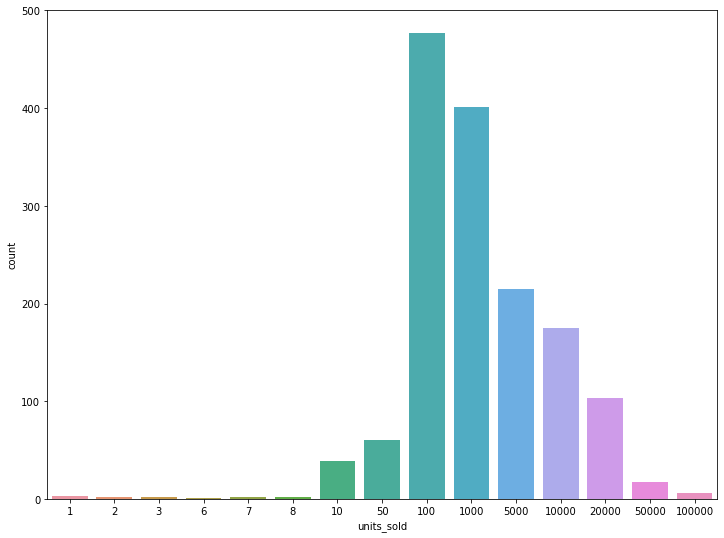

In [101]:
plt.subplots(figsize=(12,9))
ax = sns.countplot(x='units_sold', data=data)

<Figure size 7200x3240 with 0 Axes>

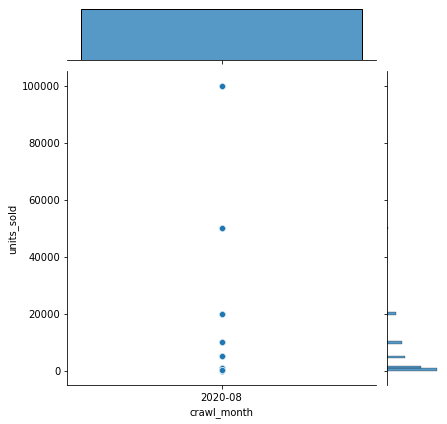

In [102]:
#Month and items sold
cmp_table=productsdf[['units_sold','crawl_month']]
plt.figure(figsize=(100,45))
sns.jointplot(data=cmp_table,
             x='crawl_month',
             y='units_sold')
plt.show()

<Figure size 7200x3240 with 0 Axes>

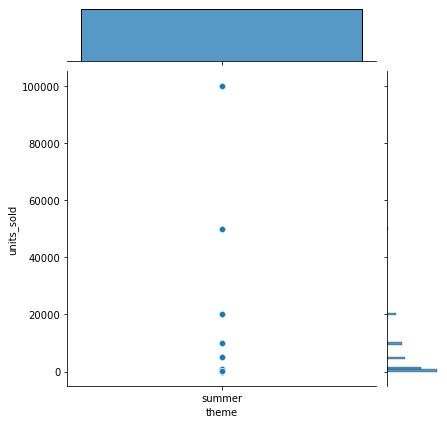

In [103]:
cmp_table=productsdf[['units_sold','theme']]
plt.figure(figsize=(100,45))
sns.jointplot(data=cmp_table,
             x='theme',
             y='units_sold')
plt.show()